In [1]:
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms

rcParams.update({'figure.figsize': (8, 6), 'axes.spines.top': False,
                 'axes.spines.right': False, 'axes.labelsize': 14,
                 'axes.titlesize': 16, 'axes.titleweight': 'bold',
                 'lines.linewidth': 3})

# Extensions to the Fire Model

## 0 Download Results from Google Drive

In [2]:
# Install gdown
!pip install gdown

Defaulting to user installation because normal site-packages is not writeable
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-4.2.0-py3-none-any.whl size=14262 sha256=49605935066b0a5079c5b8b90e609366a06e83f5d9e4f5cda3ed386b57f15882
  Stored in directory: /home/llorenzo/.cache/pip/wheels/68/11/97/886e5796b655bf28bf4a0d75e933ea71c6d7d34be701168d1d
Successfully built gdown
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/opt/conda/bin/python3.9 -m pip install --upgrade pip' command.


In [4]:
import gdown

url = 'https://drive.google.com/uc?id=1jUhJ5K-QC4zcZUCjv--VQPBgA2a4DLjL'
output = '../results.zip'

gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1jUhJ5K-QC4zcZUCjv--VQPBgA2a4DLjL
To: /home/llorenzo/phdinds2024/Term 1/MTAC/percolation_diffusion/results.zip
100%|██████████| 187M/187M [00:07<00:00, 25.5MB/s] 


'../results.zip'

In [5]:
!rm -Rdf ../results/
!unzip ../results.zip -d ../results/

Archive:  ../results.zip
  inflating: ../results/density-prob.csv  
  inflating: ../results/eastbound-wind.csv  
  inflating: ../results/modified_fire_table.csv  
  inflating: ../results/num-sparks.csv  


### Create results plots directory

In [71]:
!mkdir ../results/plots/

## 1 Von Neumann Neighbors versus Moore Neighbors

### Loading of Results

In [73]:
# Set results path and column names
results_path = '../results/modified_fire_table.csv'
col_names = ['run_number', 'density', 'moore', 'step', 'pct_burned_trees',
             'percolated']

# Read csv then change column names
results = pd.read_csv(results_path, skiprows=6)
results.columns = col_names

In [74]:
# Get percolation and burned_tree results
percolation_results = (results.groupby(['run_number', 'density', 'moore'],
                                       as_index=False).percolated.max())
bt_results = (results.groupby(['run_number', 'density', 'moore'],
                              as_index=False).pct_burned_trees.max())

### Von Neumann Neighbors

In [75]:
# Aggregate results of von neumann neighbors
vn_bt = (bt_results[bt_results.moore == False].groupby('density')
         .pct_burned_trees.mean())
vn_percolation = (percolation_results[percolation_results.moore == False]
                  .groupby('density').percolated.mean() * 100)

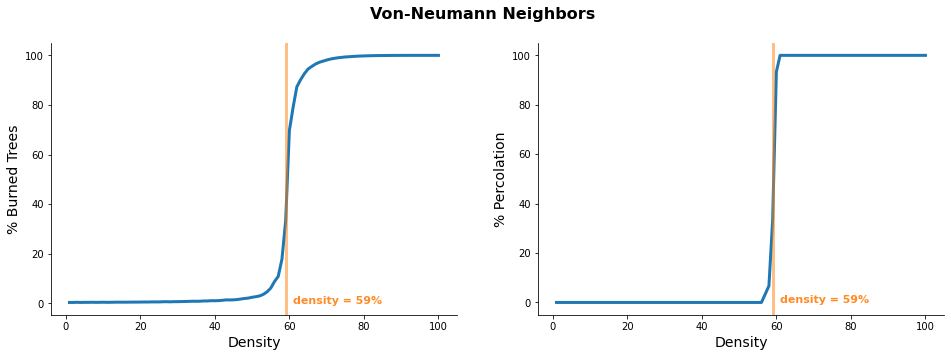

In [76]:
# Initialize figure
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot burned trees and percent percolation
vn_bt.plot(ax=axes[0])
vn_percolation.plot(ax=axes[1])

# Set axes labels and titles
axes[0].set_ylabel("% Burned Trees")
axes[1].set_ylabel("% Percolation")
for ax in axes:
    ax.set_xlabel("Density")

    # Set annotation line and text
    ax.axvline(59, color='tab:orange', alpha=0.50)
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.text(61, 0.01, "density = 59%", color='tab:orange', weight='bold',
            alpha=0.90, fontsize=11)
fig.suptitle("Von-Neumann Neighbors", fontsize=16, weight='bold')
plt.savefig('../results/plots/vn_neighbors.png', bbox_inches='tight',
             transparent=False, facecolor='white', dpi=150);

### Moore Neighobrs

In [77]:
# Aggregate results of moore neighbors
moore_bt = (bt_results[bt_results.moore == True].groupby('density')
            .pct_burned_trees.mean())
moore_percolation = (percolation_results[percolation_results.moore == True]
                     .groupby('density').percolated.mean() * 100)

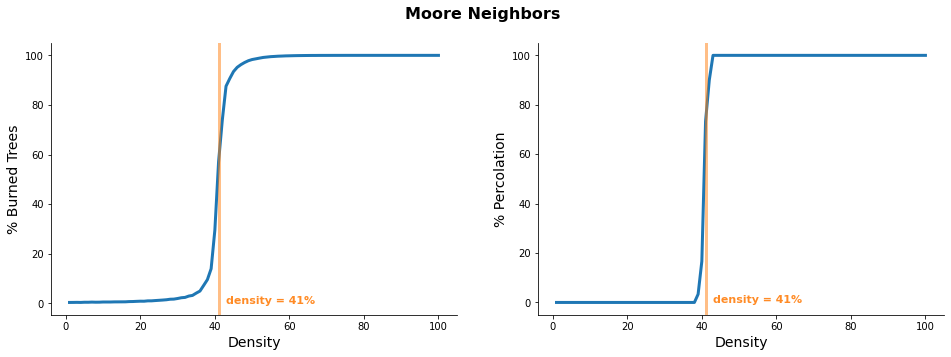

In [78]:
# Initialize figure
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot burned trees and percent percolation
moore_bt.plot(ax=axes[0])
moore_percolation.plot(ax=axes[1])

# Set axes labels and titles
axes[0].set_ylabel("% Burned Trees")
axes[1].set_ylabel("% Percolation")
for ax in axes:
    ax.set_xlabel("Density")

    # Set annotation line and text
    ax.axvline(41, color='tab:orange', alpha=0.50)
    trans = transforms.blended_transform_factory(ax.transData, ax.transAxes)
    ax.text(43, 0.01, "density = 41%", color='tab:orange', weight='bold',
            alpha=0.90, fontsize=11)
fig.suptitle("Moore Neighbors", fontsize=16, weight='bold')
plt.savefig('../results/plots/moore_neighbors.png', bbox_inches='tight',
             transparent=False, facecolor='white', dpi=150);

## 2 Probabilistic Transitions

In [79]:
# Set results path and column names
prob_path = '../results/density-prob.csv'
col_names = ['run_number', 'density', 'moore', 'probability_transmission',
             'step', 'pct_burned_trees', 'percolated']

# Read csv then change column names
prob_results = pd.read_csv(prob_path, skiprows=6)
prob_results.columns = col_names
prob_results.loc[:, 'pct_burned_trees'] = prob_results.pct_burned_trees.replace('<RuntimePrimitiveException>', '0').astype(float)

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [80]:
# Get percolation and burned_tree results
prob_percolation = (prob_results.groupby(
    ['run_number', 'density', 'probability_transmission'], as_index=False)
                    .percolated.max()
                    .groupby(['density', 'probability_transmission'])
                    .percolated.mean() * 100).to_frame().reset_index()
prob_bt = (prob_results.groupby(
    ['run_number', 'density', 'probability_transmission'], as_index=False)
           .pct_burned_trees.max()
           .groupby(['density', 'probability_transmission'])
           .pct_burned_trees.mean().to_frame().reset_index())

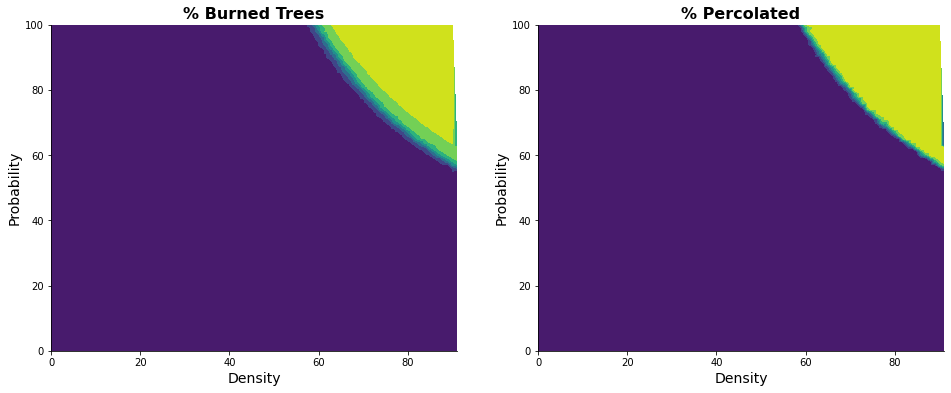

In [81]:
# Initialize figure
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Generate contour plots
axes[0].tricontourf(prob_bt.density,
                    prob_bt.probability_transmission,
                    prob_bt.pct_burned_trees)
axes[1].tricontourf(prob_percolation.density,
                    prob_percolation.probability_transmission,
                    prob_percolation.percolated)

# Set axis labels
for ax in axes:
    ax.set_ylabel("Probability")
    ax.set_xlabel("Density")
axes[0].set_title("% Burned Trees")
axes[1].set_title("% Percolated")

plt.savefig('../results/plots/prob-dense.png', bbox_inches='tight',
             transparent=False, facecolor='white', dpi=150);

## 3 Wind Factor

### Loading of Results

In [82]:
# Set results path and column names
wind_path = '../results/eastbound-wind.csv'
col_names = ['run_number', 'eastbound_wind', 'density', 'northbound_wind',
             'moore', 'probability_transmission', 'step', 'pct_burned_trees',
             'percolated']

# Read csv then change column names
wind_results = pd.read_csv(wind_path, skiprows=6)
wind_results.columns = col_names

In [83]:
# Get percolation and burned_tree results
wind_percolation = (wind_results.groupby(
    ['run_number', 'density', 'eastbound_wind'], as_index=False)
                    .percolated.max()
                    .groupby(['density', 'eastbound_wind'])
                    .percolated.mean() * 100).to_frame().reset_index()
wind_bt = (wind_results.groupby(['run_number', 'eastbound_wind', 'density'],
                                as_index=False).pct_burned_trees.max()
           .groupby(['density', 'eastbound_wind']).pct_burned_trees.mean().to_frame().reset_index())

### Plotting Results

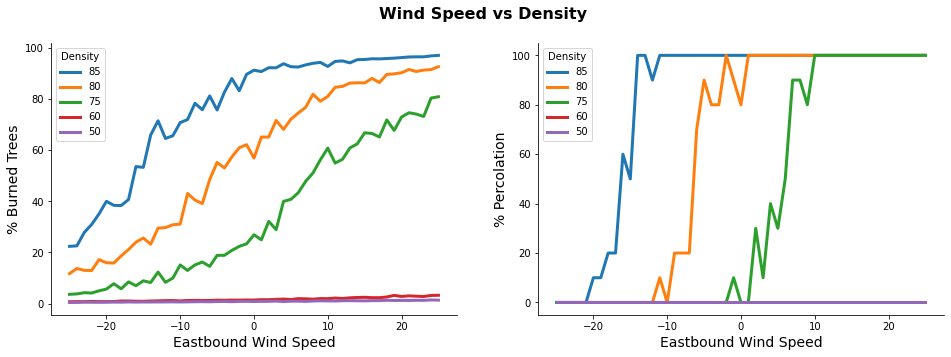

In [84]:
# Initialize figure
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot burned trees and percent percolation
for density in wind_bt.density.unique()[::-1]:
    wind_bt[wind_bt.density == density].plot(
        x='eastbound_wind', y='pct_burned_trees', ax=axes[0],
        label=f'{density}')
    wind_percolation[wind_percolation.density == density].plot(
        x='eastbound_wind', y='percolated', ax=axes[1],
        label=f'{density}')

# Set axes labels and titles
axes[0].set_ylabel("% Burned Trees")
axes[1].set_ylabel("% Percolation")
for ax in axes:
    ax.set_xlabel("Eastbound Wind Speed")
    l = ax.legend()
    l.set_title("Density")
fig.suptitle("Wind Speed vs Density", fontsize=16, weight='bold')
plt.savefig('../results/plots/wind-dense.png', bbox_inches='tight',
             transparent=False, facecolor='white', dpi=150);

## 4 Sparks Initialization

### Loading of Results

In [85]:
# Set results path and column names
sparks_path = '../results/num-sparks.csv'
col_names = ['run_number', 'eastbound_wind', 'density', 'northbound_wind',
             'moore', 'num_sparks', 'probability_transmission', 'step',
             'pct_burned_trees']

# Read csv then change column names
sparks_results = pd.read_csv(sparks_path, skiprows=6)
sparks_results.columns = col_names

In [86]:
# Get percolation and burned_tree results
sparks_results = (sparks_results
                  .groupby(['run_number', 'num_sparks', 'density'],
                           as_index=False)
                  .pct_burned_trees.max()
                  .groupby(['num_sparks', 'density']).pct_burned_trees.mean()
                  .to_frame().reset_index())

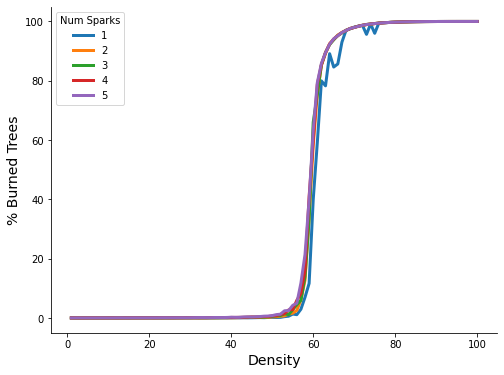

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

for num_spark in sparks_results.num_sparks.unique():
    sparks_results[sparks_results.num_sparks == num_spark].plot(
        x='density', y='pct_burned_trees', label=f'{num_spark}',
        ax=ax)
l = ax.legend()
l.set_title("Num Sparks")

ax.set_xlabel("Density")
ax.set_ylabel("% Burned Trees")
plt.savefig('../results/plots/sparks.png', bbox_inches='tight',
             transparent=False, facecolor='white', dpi=150);